# Allen atlas image regression

In [3]:
import numpy as np
import os
import functools
import time
from tqdm import tqdm
from allensdk.core.reference_space import ReferenceSpace
from allensdk.core.reference_space_cache import ReferenceSpaceCache
from atlas_functions import *

## Opening of structure graph

In [4]:
reference_space_key = 'annotation/ccf_2017'
resolution = 25
rspc = ReferenceSpaceCache(resolution, reference_space_key, manifest='manifest.json')
# ID 1 is the adult mouse structure graph
tree = rspc.get_structure_tree(structure_graph_id=1) 

## Let's take a look at a specific structure (Dorsal auditory area)

In [7]:
structure = tree.get_structures_by_name(['Isocortex'])[0].get('id')
print(structure)

315


In [8]:
# get a structure's parent
tree.parents([8])

[{'acronym': 'root',
  'graph_id': 1,
  'graph_order': 0,
  'id': 997,
  'name': 'root',
  'structure_id_path': [997],
  'structure_set_ids': [691663206],
  'rgb_triplet': [255, 255, 255]}]

In [9]:
# get a dictionary mapping structure ids to names

name_map = tree.get_name_map()
name_map[247]

'Auditory areas'

In [35]:
# ask whether one structure is contained within another

structure_id_a = 533
structure_id_b = 315

is_desc = '' if tree.structure_descends_from(structure_id_a, structure_id_b) else ' not'
print( '{0} is{1} in {2}'.format(name_map[structure_id_a], is_desc, name_map[structure_id_b]) )

posteromedial visual area is in Isocortex


In [11]:
# build a custom map that looks up acronyms by ids
# the syntax here is just a pair of node-wise functions. 
# The first one returns keys while the second one returns values

acronym_map = tree.value_map(lambda x: x['id'], lambda y: y['acronym'])
print( acronym_map[structure_id_a] )

Isocortex


In [12]:
annotation, meta = rspc.get_annotation_volume()
# The file should appear in the reference space key directory
os.listdir(reference_space_key)

['annotation_25.nrrd']

In [15]:
rsp = rspc.get_reference_space()

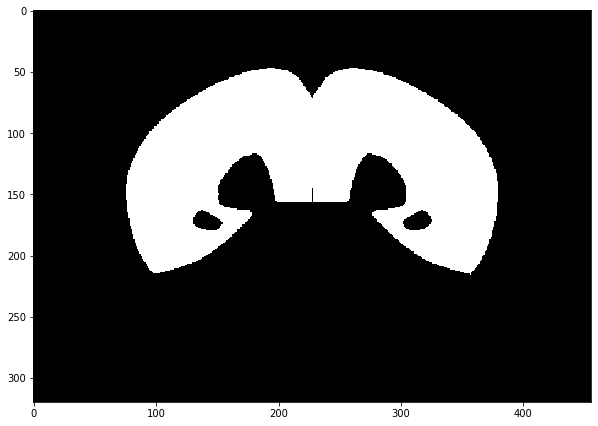

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# A complete mask for one structure
whole_cortex_mask = rsp.make_structure_mask([315])

# view in coronal section
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(whole_cortex_mask[150, :], interpolation='none', cmap=plt.cm.afmhot)

In [23]:
# This gets all of the structures targeted by the Allen Brain Observatory project
brain_observatory_structures = rsp.structure_tree.get_structures_by_set_id([514166994])
print(brain_observatory_structures)
brain_observatory_ids = [st['id'] for st in brain_observatory_structures]
print(brain_observatory_ids)

brain_observatory_mask = rsp.make_structure_mask(brain_observatory_ids)
print(brain_observatory_mask)

# view in horizontal section
#fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(brain_observatory_mask[:, 40, :], interpolation='none', cmap=plt.cm.afmhot)

[{'acronym': 'VISal', 'graph_id': 1, 'graph_order': 164, 'id': 402, 'name': 'Anterolateral visual area', 'structure_id_path': [997, 8, 567, 688, 695, 315, 669, 402], 'structure_set_ids': [396673091, 112905828, 688152357, 691663206, 687527945, 12, 184527634, 514166994, 167587189, 114512891], 'rgb_triplet': [8, 133, 140]}, {'acronym': 'VISam', 'graph_id': 1, 'graph_order': 171, 'id': 394, 'name': 'Anteromedial visual area', 'structure_id_path': [997, 8, 567, 688, 695, 315, 669, 394], 'structure_set_ids': [396673091, 112905828, 688152357, 691663206, 687527945, 12, 184527634, 514166994, 167587189, 114512891], 'rgb_triplet': [8, 133, 140]}, {'acronym': 'VISl', 'graph_id': 1, 'graph_order': 178, 'id': 409, 'name': 'Lateral visual area', 'structure_id_path': [997, 8, 567, 688, 695, 315, 669, 409], 'structure_set_ids': [396673091, 112905828, 688152357, 691663206, 687527945, 12, 184527634, 514166994, 167587189, 114512891], 'rgb_triplet': [8, 133, 140]}, {'acronym': 'VISp', 'graph_id': 1, 'graph

In [14]:
# Define a wrapper function that will control the mask generation. 
# This one checks for a nrrd file in the specified base directory 
# and builds/writes the mask only if one does not exist
annotation_dir = 'annotation'
mask_writer = functools.partial(ReferenceSpace.check_and_write, annotation_dir)
    
# many_structure_masks is a generator - nothing has actrually been run yet
mask_generator = rsp.many_structure_masks([385, 1097], mask_writer)

# consume the resulting iterator to make and write the masks
for structure_id in mask_generator:
    print( 'made mask for structure {0}.'.format(structure_id) ) 

os.listdir(annotation_dir)

made mask for structure 385.
made mask for structure 1097.


['ccf_2017', 'structure_385.nrrd', 'structure_1097.nrrd']

In [15]:
# Double-check the voxel counts
no_voxel_id = rsp.structure_tree.get_structures_by_name(['Somatosensory areas, layer 6a'])[0]['id']
print( 'voxel count for structure {0}: {1}'.format(no_voxel_id, rsp.total_voxel_map[no_voxel_id]) )

# remove unassigned structures from the ReferenceSpace's StructureTree
rsp.remove_unassigned()

# check the structure tree
no_voxel_id in rsp.structure_tree.node_ids()

voxel count for structure 12997: 0


False

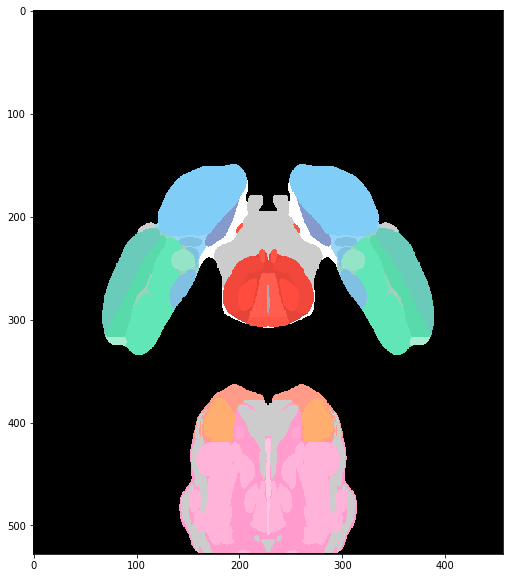

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(rsp.get_slice_image(1, 7000), interpolation = 'none')

In [219]:
dim2_min = 0
dim2_max = 7987

In [244]:
empty_matrix = np.zeros((528,456,3), dtype=np.int8)
print(empty_matrix.shape)
rsp.get_slice_image(1,0).shape[1]
#slice_matrix.shape
#plt.imshow(slice_matrix(1,2500))
#print(empty_matrix=[0,0,0])
#np.copyto(empty_matrix, slice_matrix(1, 2500))
#plt.imshow(empty_matrix)
#print(empty_matrix)

(528, 456, 3)


456

100%|█████████████████████████████████████| 7987/7987 [2:12:55<00:00,  1.00it/s]


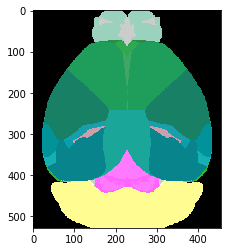

In [254]:
# same dimensions, [0,0,0] in each case

for slice in tqdm(range(dim2_min, dim2_max)):
    np.copyto(empty_matrix, rsp.get_slice_image(1, slice),where=empty_matrix==[0,0,0])
plt.imshow(empty_matrix.astype('uint8'), interpolation = 'none')

In [272]:
np.save('axial_projection_backup', empty_matrix)

In [273]:
newvariable = np.load('axial_projection_backup.npy')

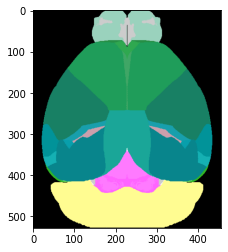

In [275]:
plt.imshow(newvariable.astype('uint8'))

#### Making a list of isocortex areas

In [25]:
isocortex_areas_names = ["Frontal pole, cerebral cortex", "Somatomotor areas", "Somatosensory areas", "Gustatory areas", \
                        "Visceral area", "Auditory areas", "Visual areas", "Anterior cingulate area", "Prelimbic area", "Infralimbic area", \
                        "Orbital area", "Agranular insular area", "Retrosplenial area","Posterior parietal association areas","Perirhinal area","Ectorhinal area"]
print(isocortex_areas_names)
isocortex_areas_IDs = []
for i in range(len(isocortex_areas_names)):
    isocortex_areas_IDs.append(tree.get_structures_by_name([isocortex_areas_names[i]])[0].get('id'))
print(isocortex_areas_IDs)

['Frontal pole, cerebral cortex', 'Somatomotor areas', 'Somatosensory areas', 'Gustatory areas', 'Visceral area', 'Auditory areas', 'Visual areas', 'Anterior cingulate area', 'Prelimbic area', 'Infralimbic area', 'Orbital area', 'Agranular insular area', 'Retrosplenial area', 'Posterior parietal association areas', 'Perirhinal area', 'Ectorhinal area']
[184, 500, 453, 1057, 677, 247, 669, 31, 972, 44, 714, 95, 254, 22, 922, 895]


#### Obtaining masks for every substructure in Isocortex

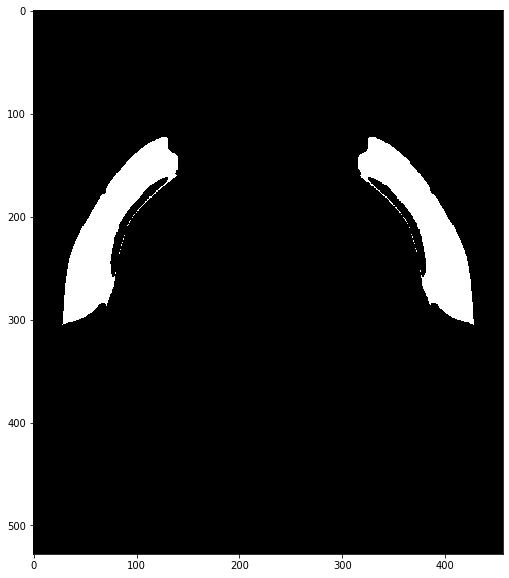

In [32]:
# This gets all of the structures targeted by the Allen Brain Observatory project
brain_observatory_structures = rsp.structure_tree.get_structures_by_set_id([514166994])
brain_observatory_ids = isocortex_areas_IDs

brain_observatory_mask = rsp.make_structure_mask(brain_observatory_ids)

# view in horizontal section
#fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(brain_observatory_mask[:, 200, :], interpolation='none', cmap=plt.cm.afmhot)

['annotation_25.nrrd']


100%|███████████████████████████████████████| 320/320 [00:00<00:00, 1936.98it/s]


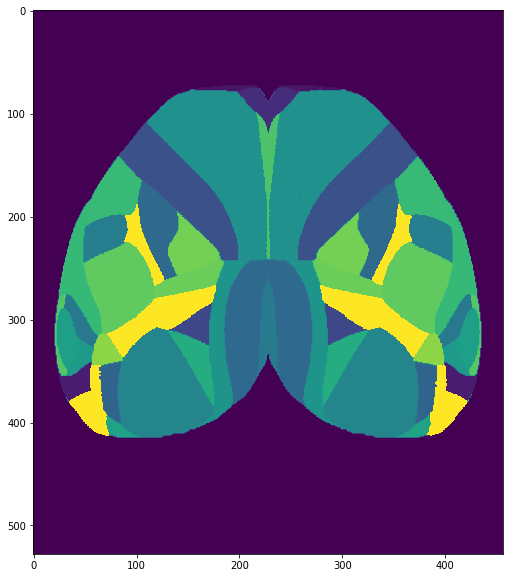

(528, 456)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
rsp, tree = open_AllenSDK()
isocortex_map, id_name_dict, bregma = map_generator(rsp, tree, structure='Isocortex')
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(isocortex_map,vmax=1300)
plt.show()
sma_mask = create_mask(isocortex_map, 656)
create_contour(sma_mask)